# Full Class Distribution Analysis

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import math
from configs.scannet_constants import *
import pandas as pd
from IPython.display import display, HTML
%matplotlib inline

In [ ]:
load = np.load("../../Downloads/class_dist_advanced.npy", allow_pickle='TRUE').item()

In [12]:
class_ids = list(load.keys())
class_vals = []
for key in load.keys():
    class_vals.append(load[key]["sum"])

## Quick Analysis

['Undefined', 'wall', 'floor', 'cabinet', 'bed', 'chair', 'sofa', 'table', 'door', 'window', 'bookshelf', 'picture', 'counter', 'desk', 'curtain', 'refrigerator', 'shower curtain', 'toilet', 'sink', 'bathtub', 'otherfurniture']


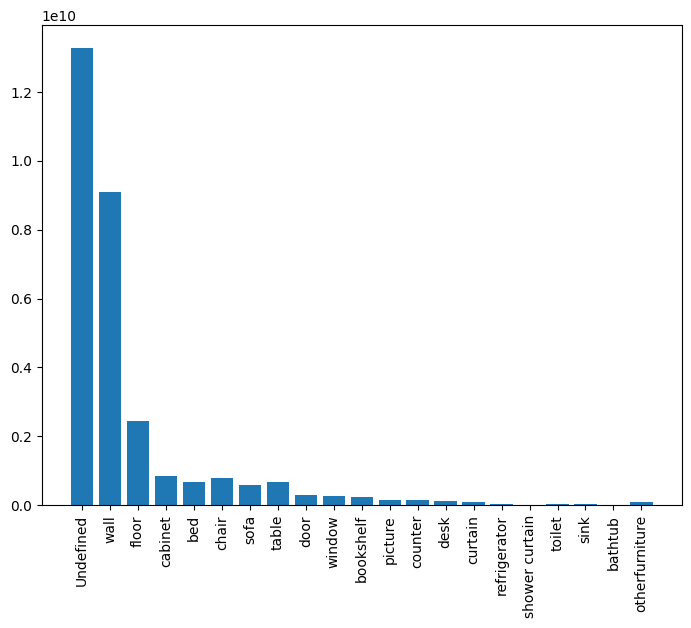

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classes = list(tuple('i')+CLASS_LABELS_20)
classes[0]="Undefined"
print(classes)
plt.xticks(rotation='vertical')
ax.bar(classes,class_vals)
plt.show()

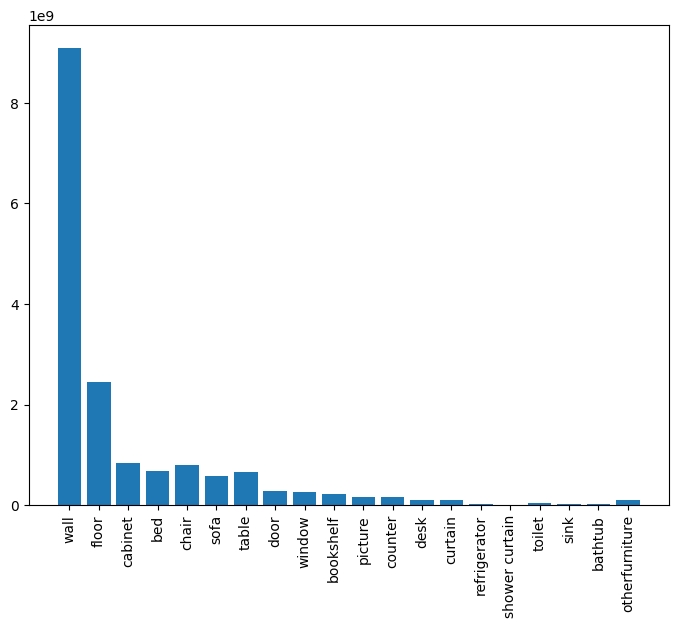

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(classes[1:],class_vals[1:])
plt.show()

In [21]:
quick_sum = {}
for i, id in enumerate(class_ids):
    quick_sum[id]=class_vals[i]
df = pd.DataFrame(quick_sum.items(), columns=["Class","Values"])
df.loc['Total'] = pd.Series(df['Values'].sum(), index=['Values'])
df['Percentage'] = df['Values']/df['Values'].sum() *200
display(df)

,Class,Values,Percentage
0,0.0,1.328170e+10,44.546938
1,1.0,9.095045e+09,30.504861
2,2.0,2.455271e+09,8.235000
3,3.0,8.381143e+08,2.811043
4,4.0,6.785740e+08,2.275943
5,5.0,7.885150e+08,2.644686
6,6.0,5.689062e+08,1.908116
7,7.0,6.547272e+08,2.195961
8,8.0,2.858319e+08,0.958683
9,9.0,2.505898e+08,0.840480


## Indepth class Analysis

### For Different Classes

In [27]:
print("Class 0", load[0]["sum"])
scene_id = list(load[0]["scenes"].keys())[0]
print("Poses", load[0]["scenes"][scene_id]["sum"])

Class 0 13281699495
Poses 76653814


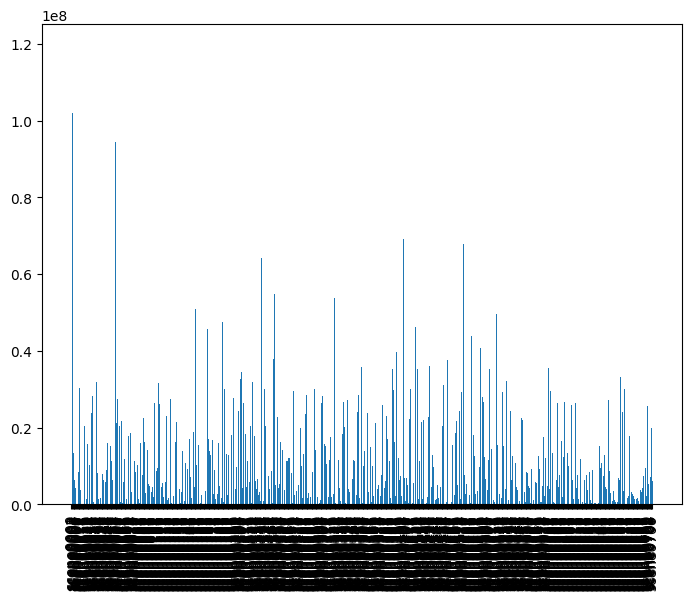

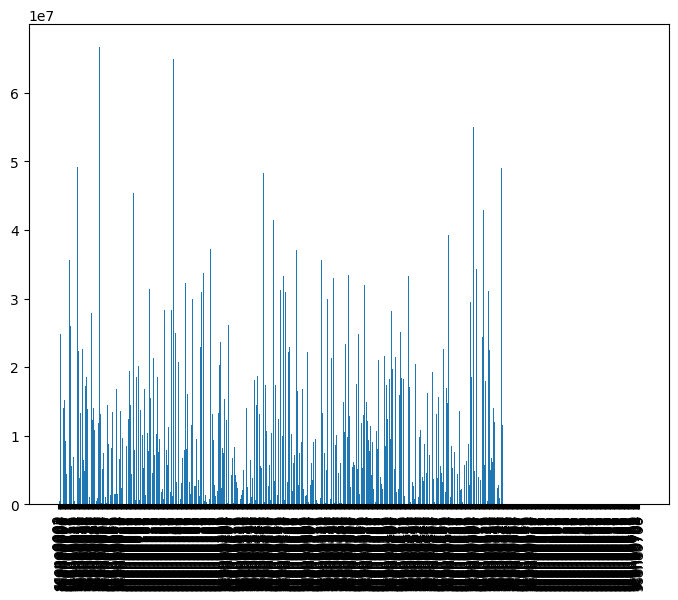

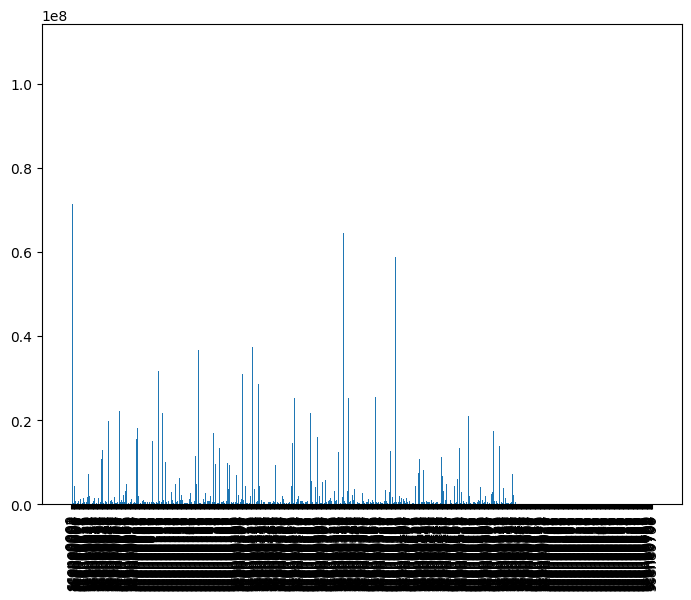

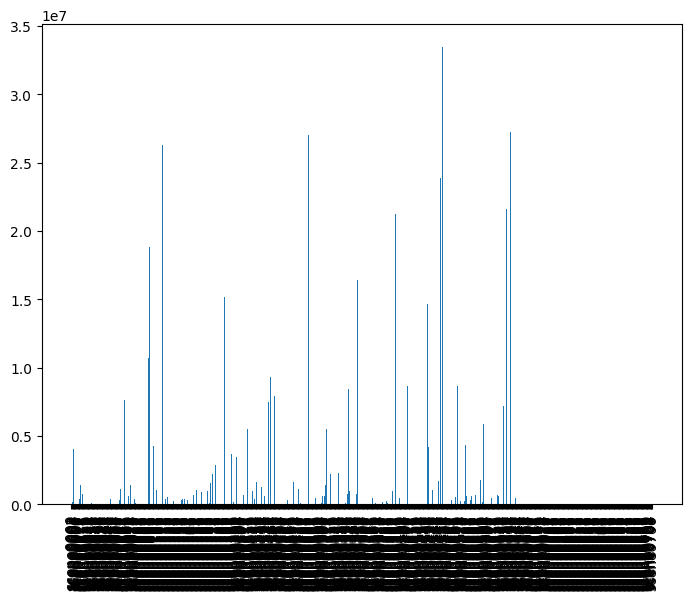

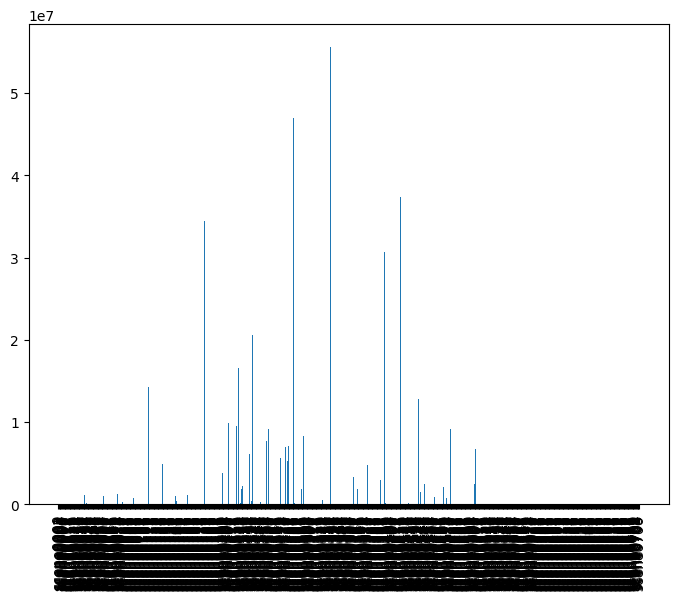

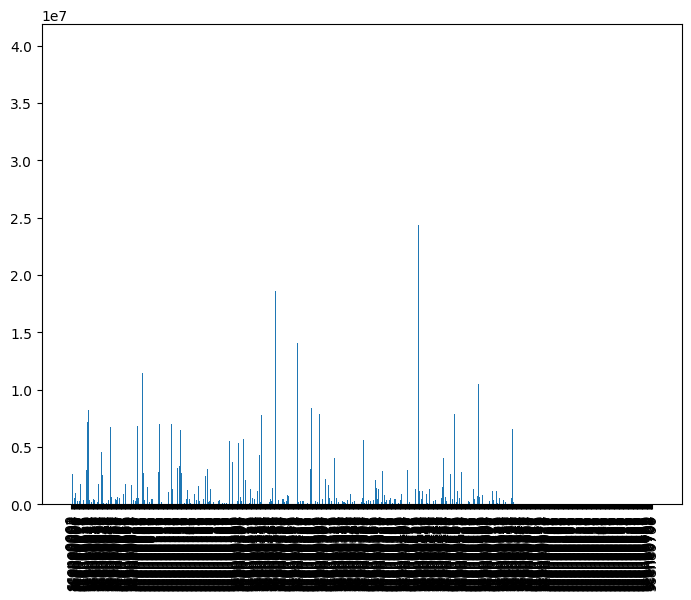

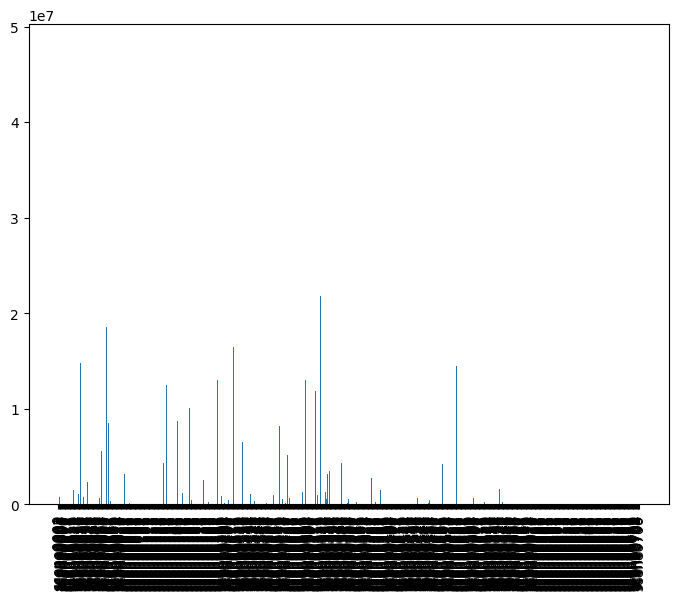

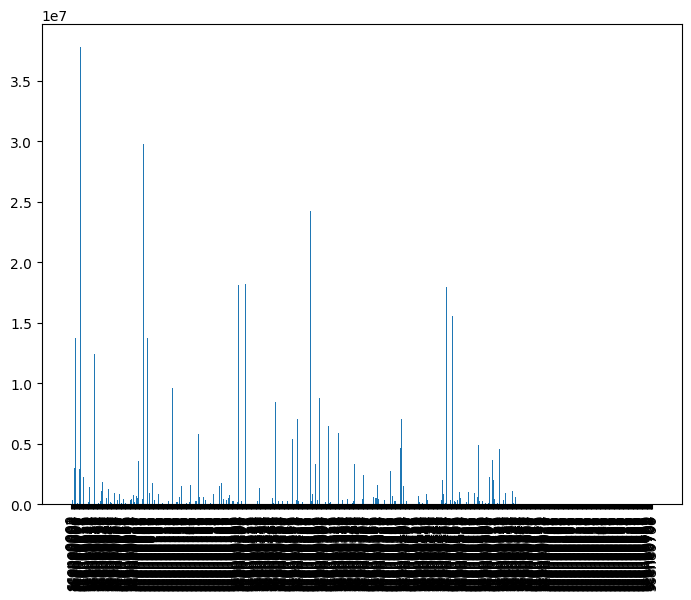

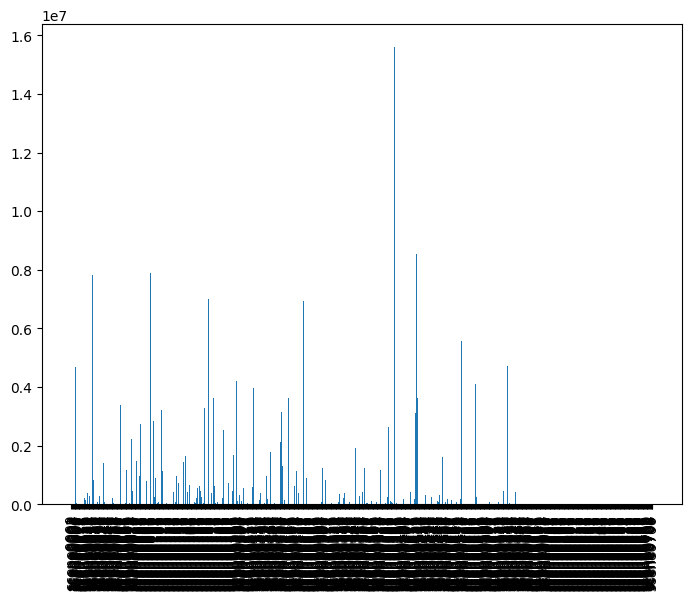

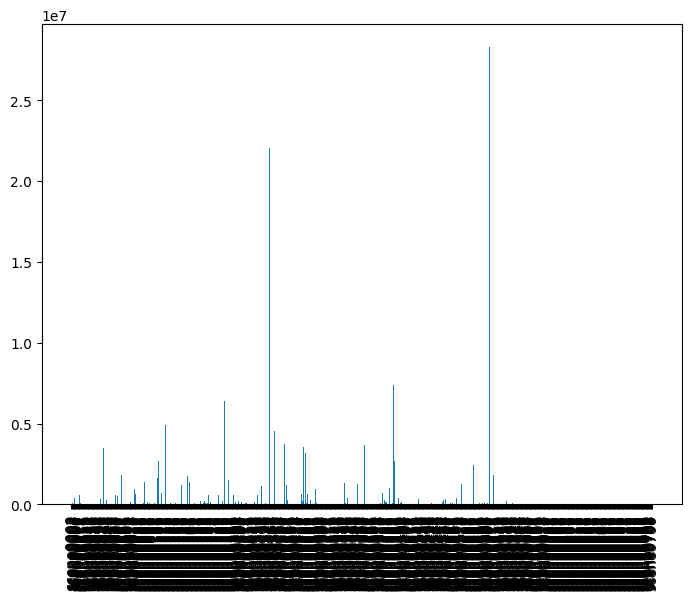

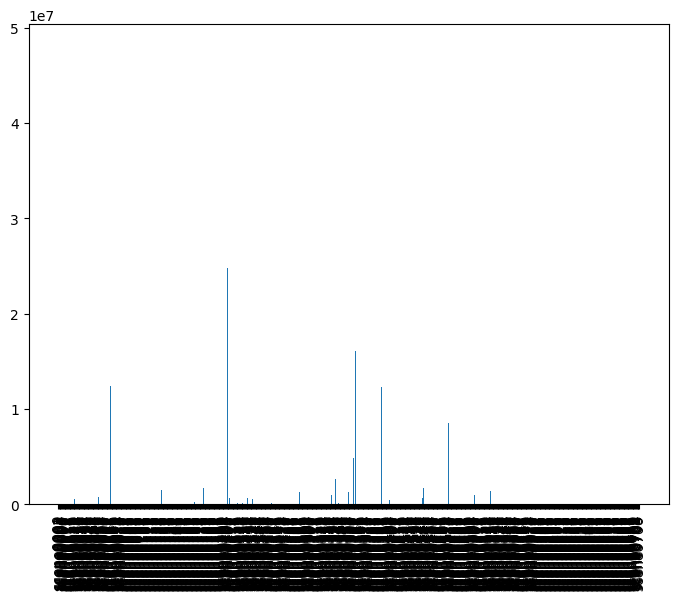

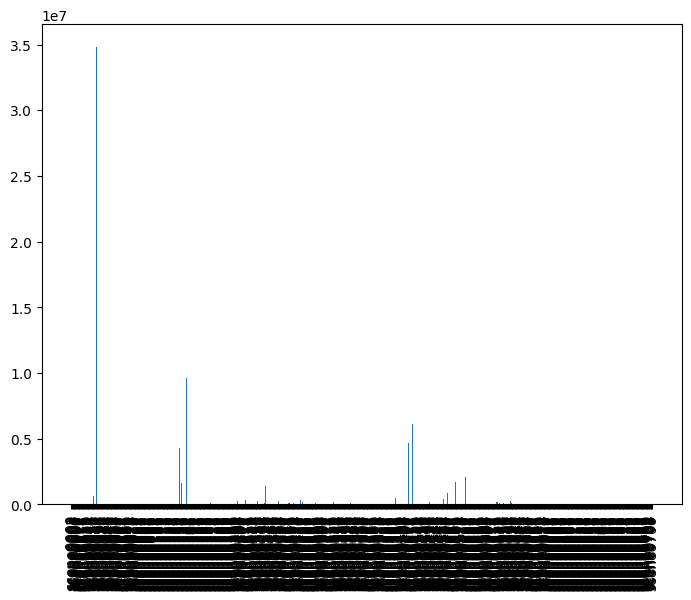

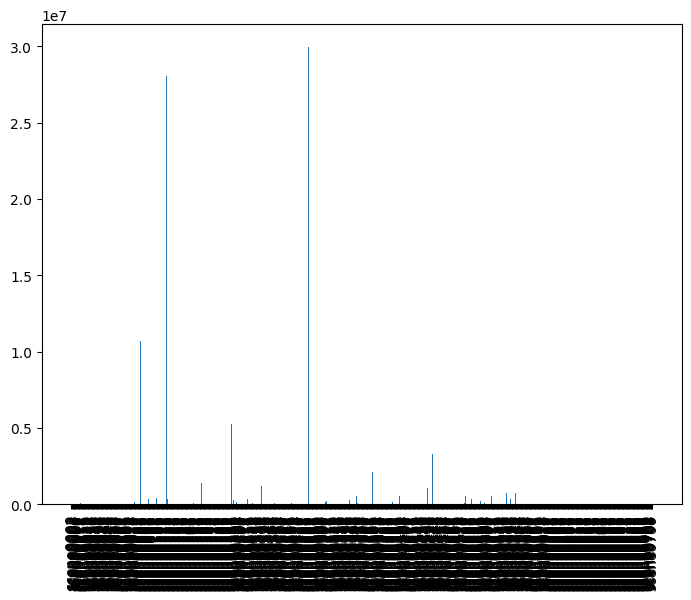

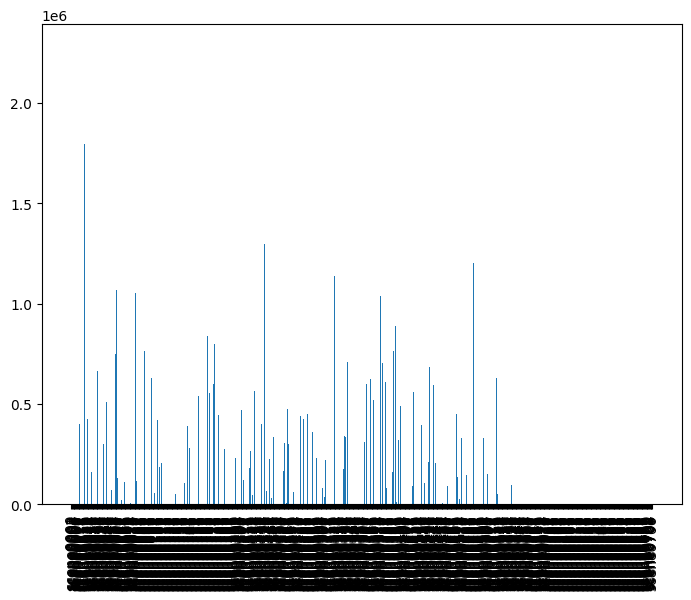

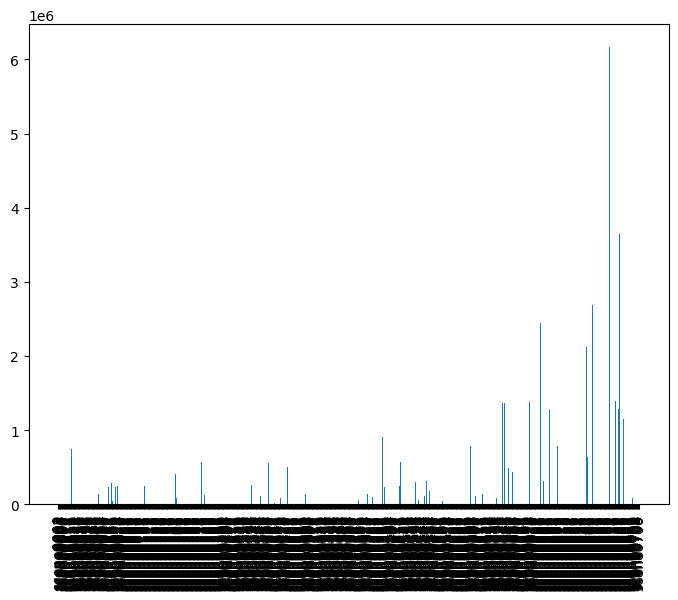

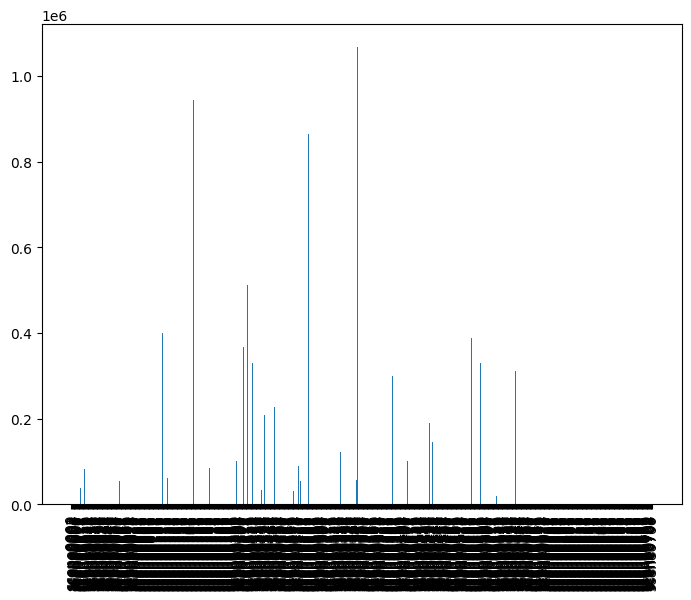

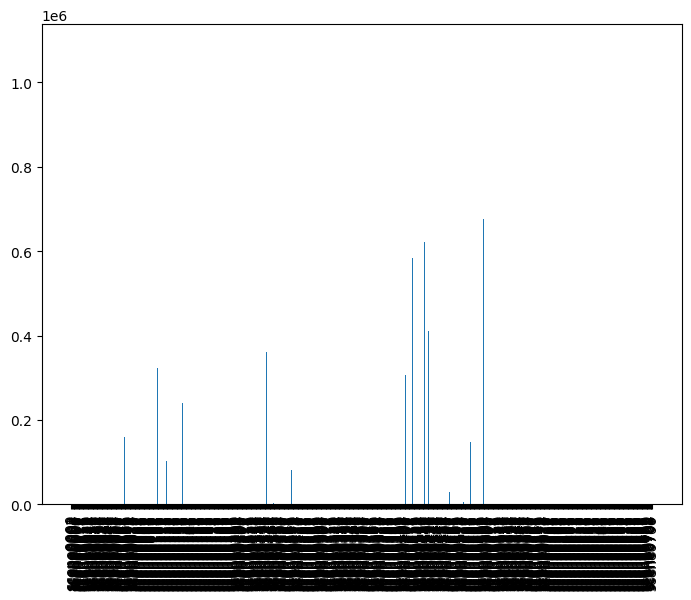

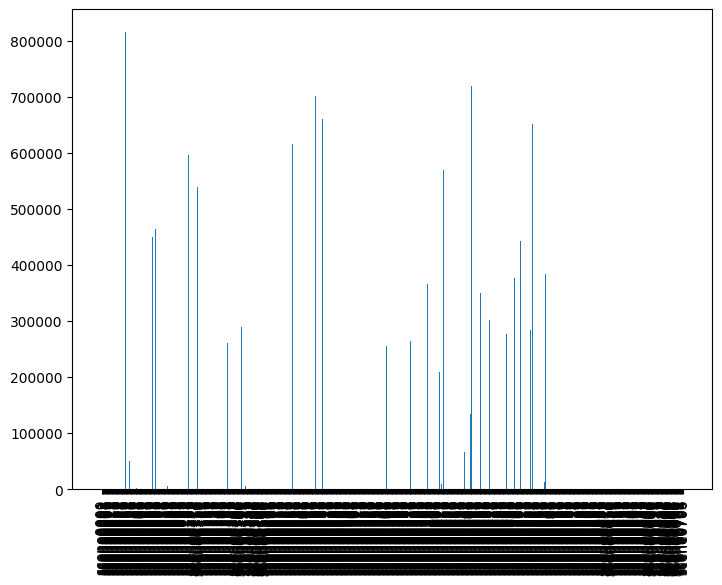

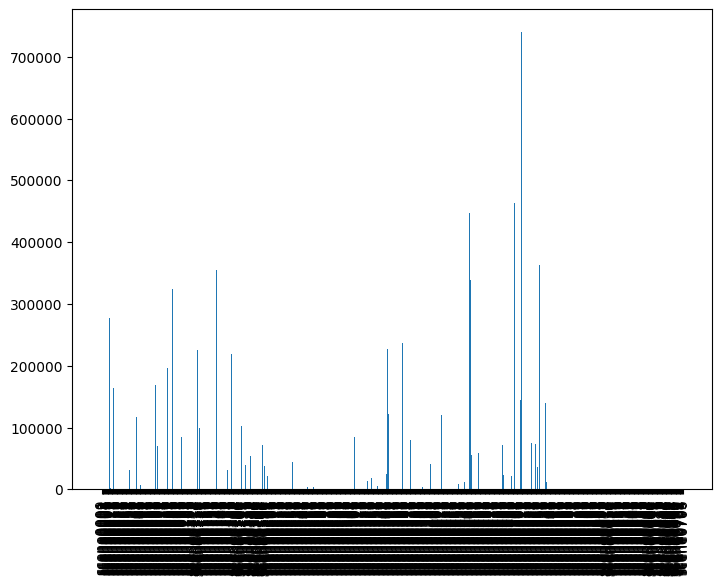

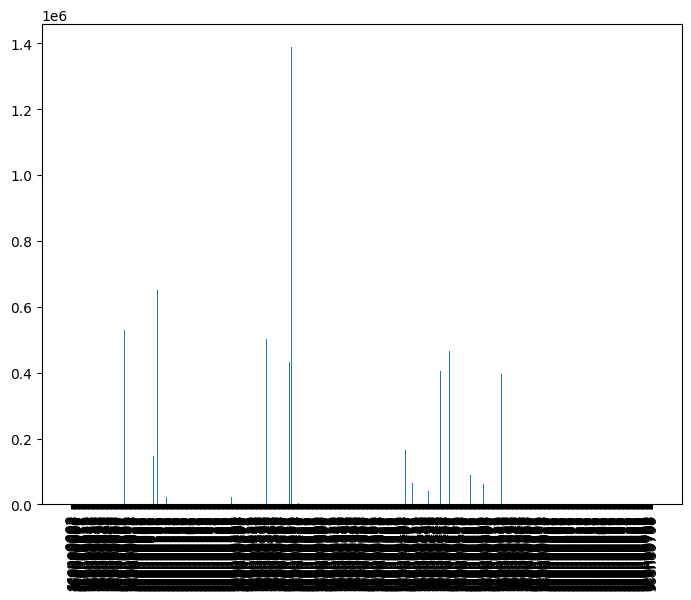

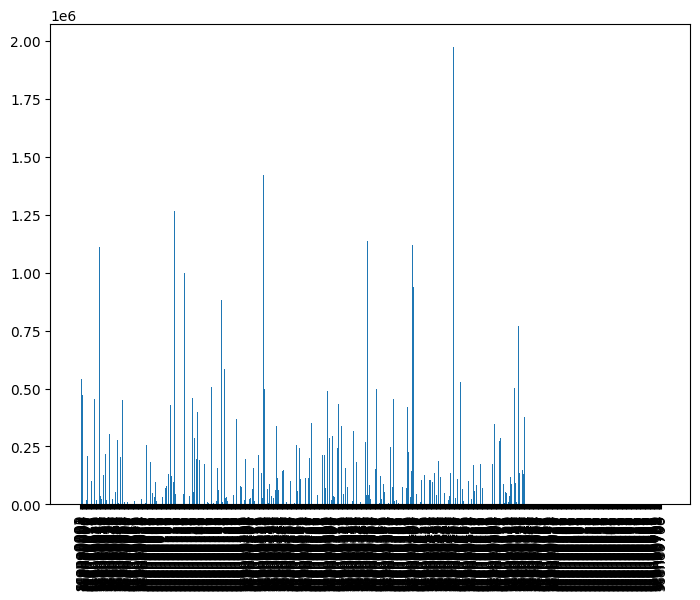

In [32]:
for class_key in load.keys():
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    poses = list(load[class_key]["scenes"].keys())
    for i, pose in enumerate(poses):
        poses[i] = poses[i].split("_")[-2]
    pose_sums = []
    for pose in list(load[class_key]["scenes"].keys()):
        pose_sums.append(load[class_key]["scenes"][pose]["sum"])
    plt.title(label=f"Class {str(class_key)}")
    plt.xticks(rotation='vertical')
    ax.bar(poses,pose_sums)
    plt.show()